In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the excel file

df_128 = pd.read_excel('AdvComp.xlsx', sheet_name='mpispeed')
df_64 = pd.read_excel('AdvComp.xlsx', sheet_name='Sheet3')

In [183]:
df_64

,Lattice,Steps,Cores,Run1,Run2,Run3,Mean,STD,Speedup,Efficiency
0,64,256,1,4.45,4.22,5.56,4.74,0.585055,1.000000,1.000000
1,64,256,2,2.47,2.24,2.09,2.27,0.156276,2.088106,1.044053
2,64,256,3,1.73,1.57,1.69,1.66,0.067987,2.855422,0.951807
3,64,256,4,1.18,1.26,1.38,1.27,0.082192,3.732283,0.933071
4,64,256,5,1.06,1.02,0.97,1.02,0.036818,4.647059,0.929412
5,64,256,6,0.81,0.89,0.99,0.90,0.073636,5.266667,0.877778
6,64,256,7,0.76,0.73,0.82,0.77,0.037417,6.155844,0.879406
7,64,256,8,0.73,0.68,0.71,0.71,0.020548,6.676056,0.834507
8,64,256,9,0.65,0.62,0.58,0.62,0.028674,7.645161,0.849462
9,64,256,10,0.52,0.56,0.54,0.54,0.016330,8.777778,0.877778


In [184]:
run_1 = df_128['Run1']
run_2 = df_128['Run2']
run_3 = df_128['Run3']

mean  = (run_1 + run_2 + run_3) / 3
std = np.std([run_1, run_2, run_3], axis=0)

speedup = mean[0] / mean

# Calculate error in speedup (propagation of error)
delta_t1 = std[0]  # Uncertainty in T1
delta_tp = std  # Uncertainty in Tp

error_speedup = speedup * np.sqrt((delta_t1 / mean[0])**2 + (delta_tp / mean)**2)

In [185]:
run_12 = df_64['Run1']
run_22 = df_64['Run2']
run_32 = df_64['Run3']

mean2  = (run_12 + run_22 + run_32) / 3
std2 = np.std([run_12, run_22, run_32], axis=0)

speedup2 = mean2[0] / mean2

# Calculate error in speedup (propagation of error)
delta_t12 = std2[0]  # Uncertainty in T1
delta_tp2 = std2  # Uncertainty in Tp

error_speedup2 = speedup2 * np.sqrt((delta_t12 / mean2[0])**2 + (delta_tp2 / mean2)**2)

In [186]:
print(speedup[19]/20)
print(speedup[14]/15)

x_line = np.linspace(1, 20, 20)
y_line = x_line * 0.869

0.7468834688346885
0.8687155240346731


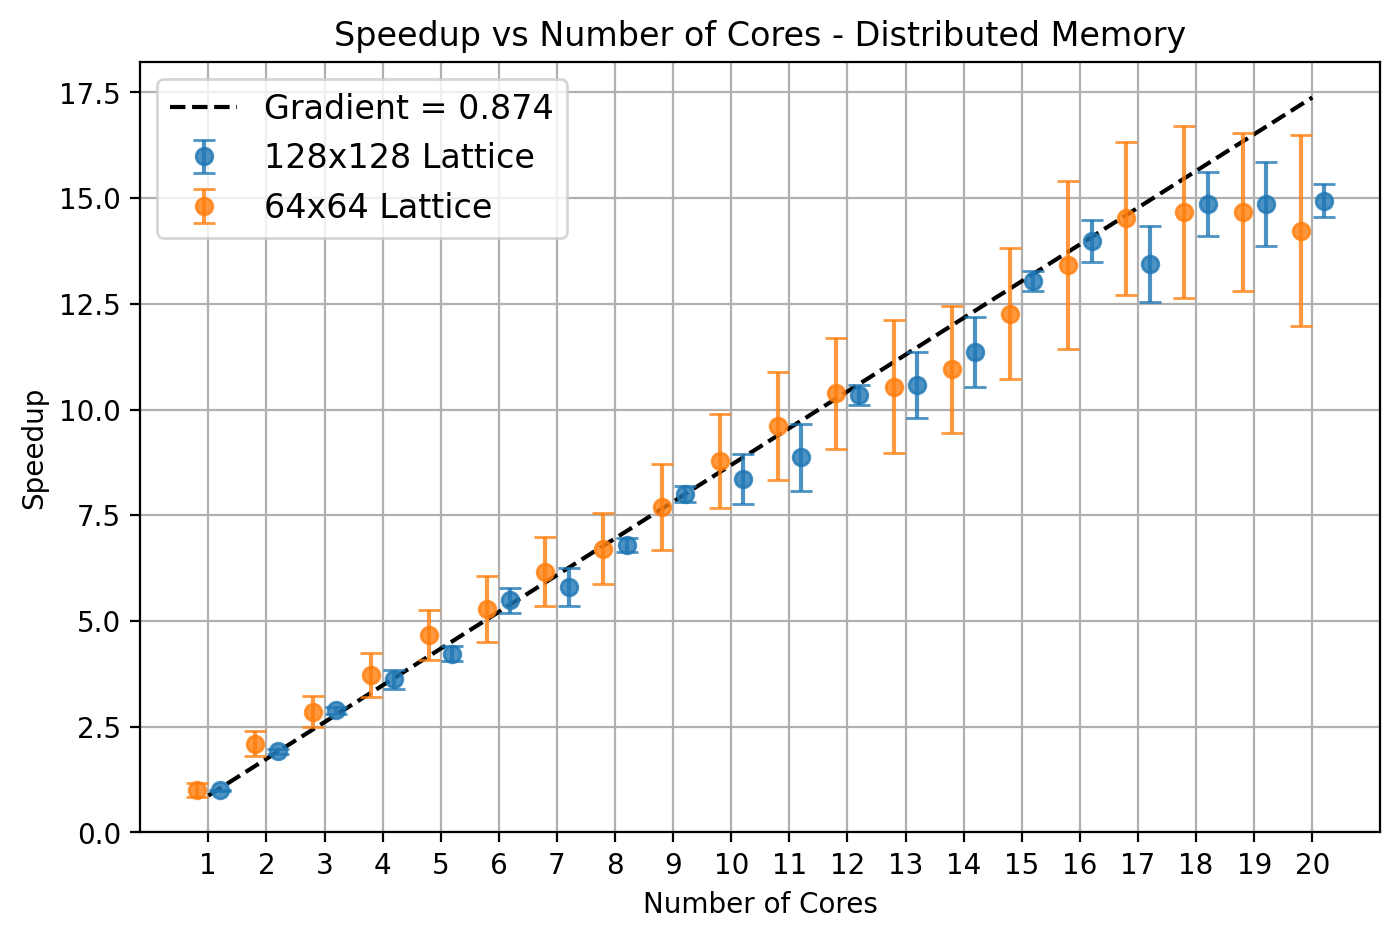

In [187]:
cores = df_128['Cores']  # Number of cores
plt.figure(figsize = (8,5), dpi=200)
offset = 0.2
plt.plot(x_line, y_line, color='black', label = "Gradient = 0.874", linestyle = '--')
plt.errorbar(cores+offset, speedup, yerr=error_speedup, fmt='o', capsize=4, label = "128x128 Lattice", alpha = 0.8)
plt.errorbar(cores-offset, speedup2, yerr=error_speedup2, fmt='o', capsize=4, label='64x64 Lattice',alpha = 0.8)
plt.xlabel('Number of Cores')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Cores - Distributed Memory')
plt.legend(fontsize = 12)
plt.xticks(cores)
plt.grid()
plt.show()

In [188]:
print(max(speedup))

14.93766937669377


In [189]:
efficiency = speedup / cores
efficiency2 = speedup2 / cores

delta_cores = 0  # Set to 0 if there's no uncertainty in cores
error_efficiency = efficiency * (error_speedup / speedup)
error_efficiency2 = efficiency2 * (error_speedup2 / speedup2)

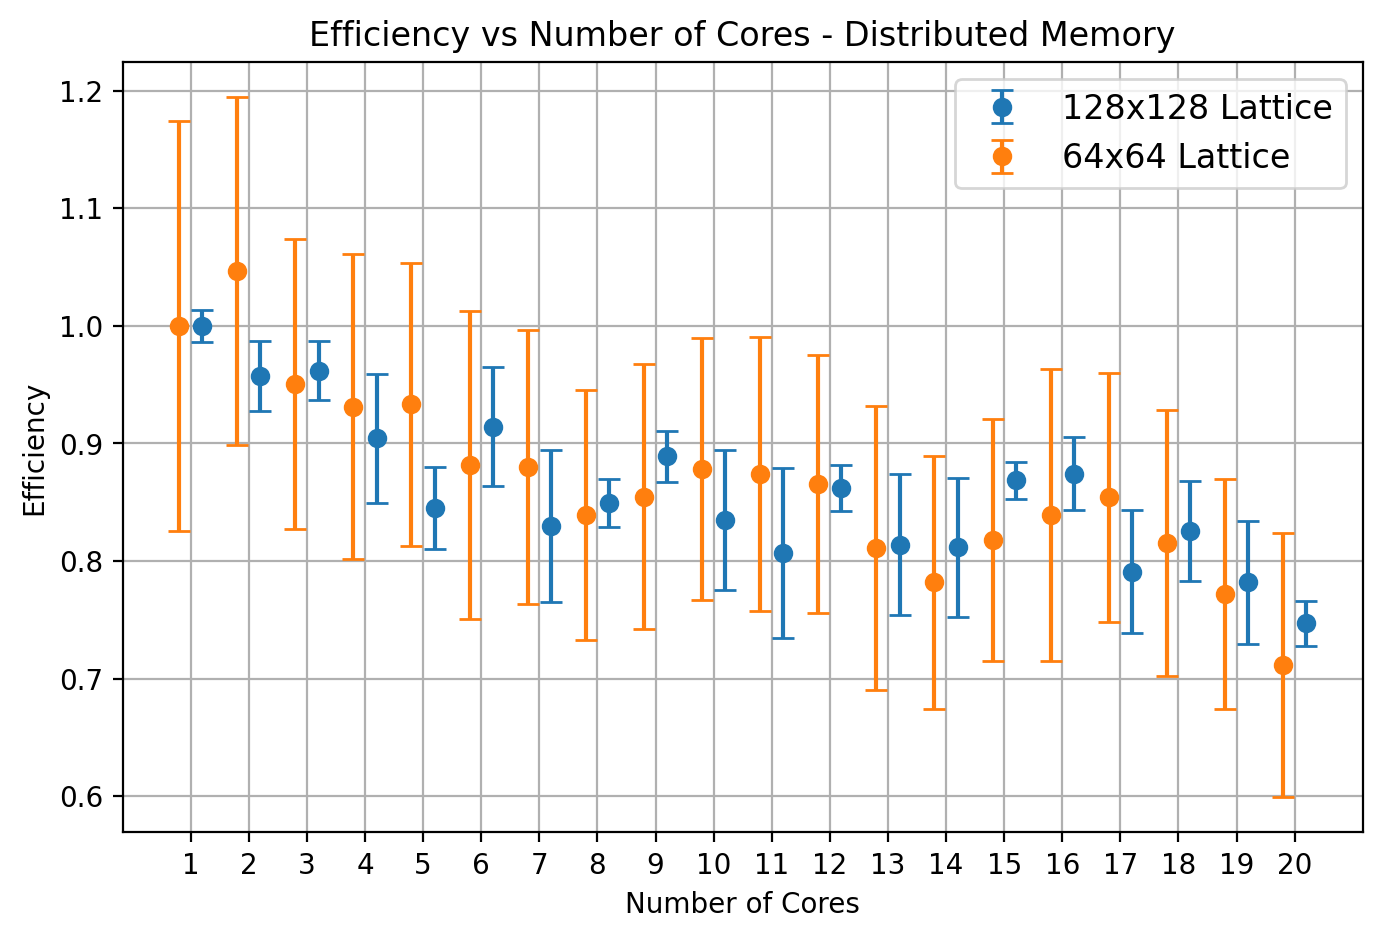

In [190]:
offset = 0.2
plt.figure(figsize = (8,5), dpi=200)
plt.errorbar(cores+offset, efficiency, yerr=error_efficiency, fmt='o', capsize=4, label = "128x128 Lattice", alpha = 1)
plt.errorbar(cores-offset, efficiency2, yerr=error_efficiency2, fmt='o', capsize=4, label='64x64 Lattice',alpha = 1)
plt.xticks(cores)
plt.xlabel('Number of Cores')
plt.ylabel('Efficiency')
plt.grid()
plt.title('Efficiency vs Number of Cores - Distributed Memory')
plt.legend(fontsize = 12)

# Shared memory

In [191]:
data = pd.read_excel('AdvComp.xlsx', sheet_name='Shared memory')

In [192]:
run_1 = data['Run1']
run_2 = data['Run2']
run_3 = data['Run3']

mean  = (run_1 + run_2 + run_3) / 3
std = np.std([run_1, run_2, run_3], axis=0)

speedup = mean[0] / mean

# Calculate error in speedup (propagation of error)

delta_t1 = std[0]  # Uncertainty in T1
delta_tp = std  # Uncertainty in Tp

error_speedup = speedup * np.sqrt((delta_t1 / mean[0])**2 + (delta_tp / mean)**2)

cores = data['Cores']  # Number of cores

efficiency = speedup / cores

delta_cores = 0  # Set to 0 if there's no uncertainty in cores

error_efficiency = efficiency * (error_speedup / speedup)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


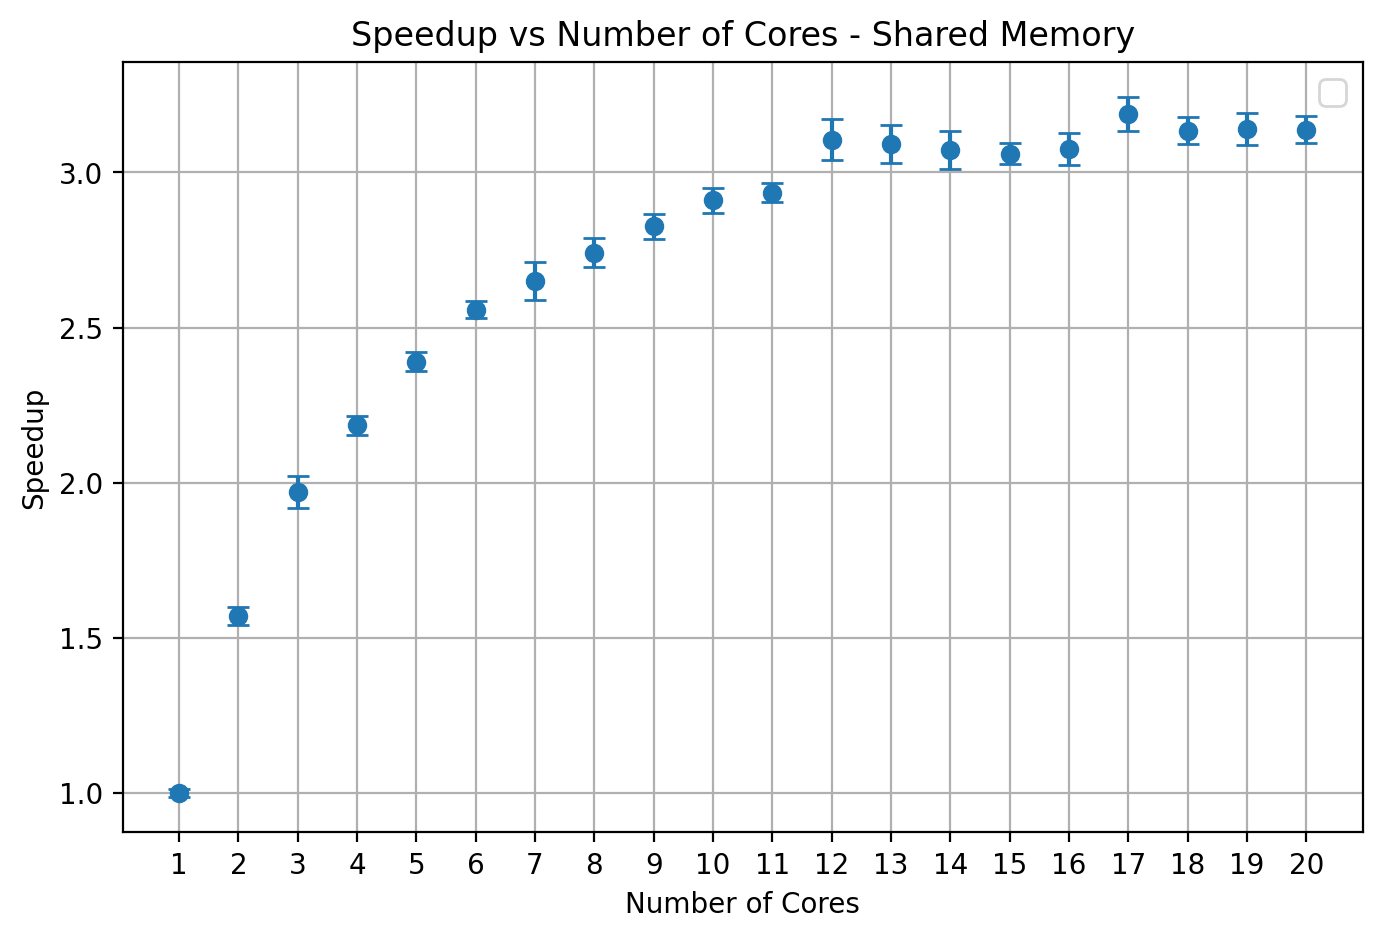

In [193]:
cores = df_128['Cores']  # Number of cores
plt.figure(figsize = (8,5), dpi=200)
plt.errorbar(cores, speedup, yerr=error_speedup, fmt='o', capsize=4)
plt.xlabel('Number of Cores')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Cores - Shared Memory')
plt.legend(fontsize = 12)
plt.xticks(cores)
plt.grid()
# plt.xscale('log')
plt.show()

In [197]:
print(np.argmax(speedup))

16


Text(0.5, 1.0, 'Efficiency vs Number of Cores - Shared Memory')

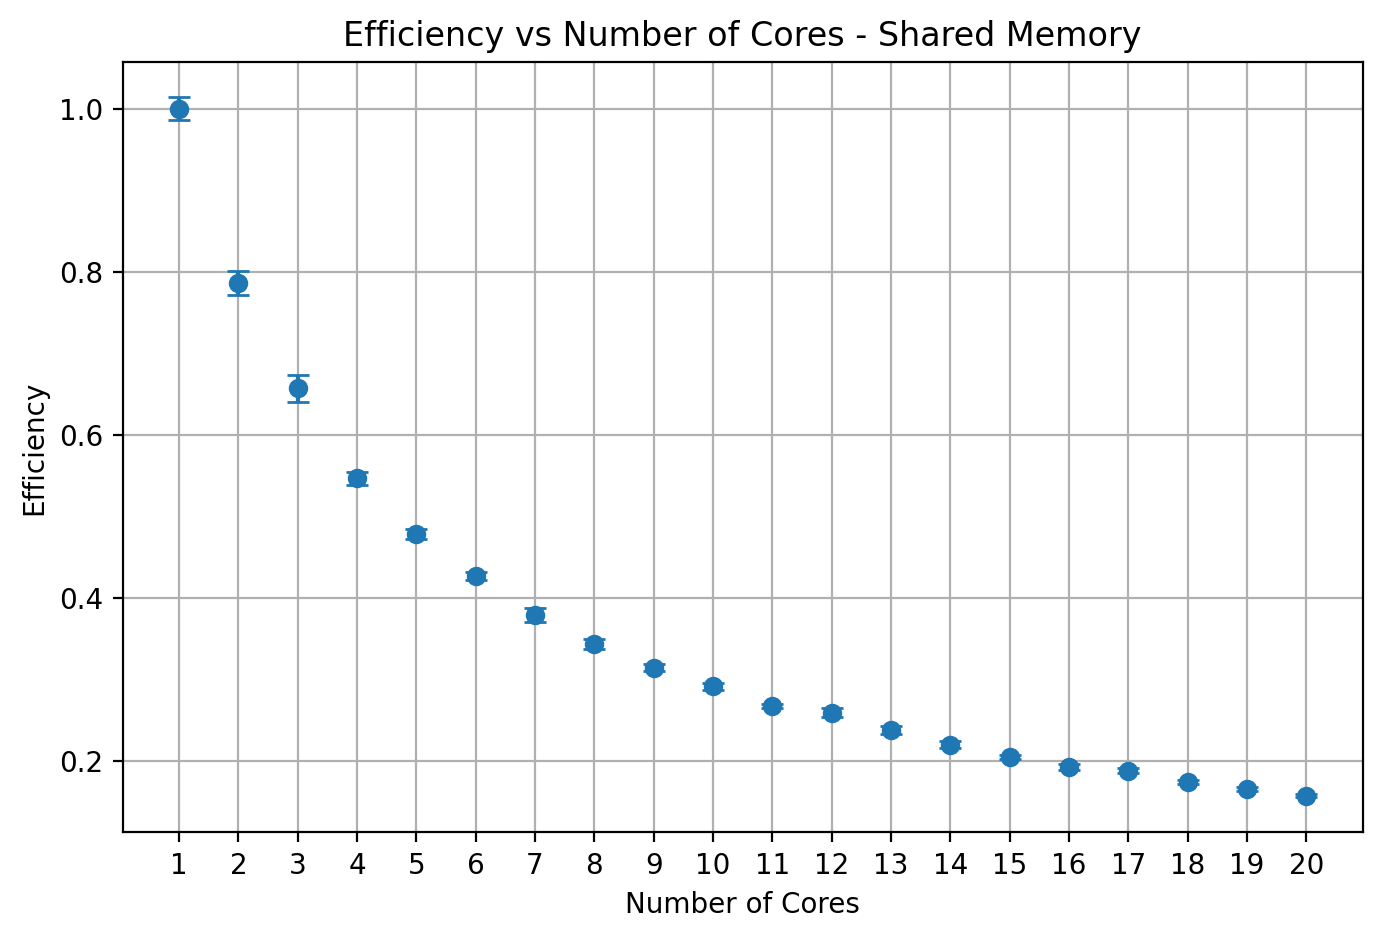

In [198]:
plt.figure(figsize = (8,5), dpi=200)
plt.errorbar(cores, efficiency, yerr=error_efficiency, fmt='o', capsize=4, label = "128x128 Lattice", alpha = 1)
plt.xticks(cores)
plt.xlabel('Number of Cores')
plt.ylabel('Efficiency')
plt.grid()
plt.title('Efficiency vs Number of Cores - Shared Memory')
# plt.legend(fontsize = 12)

In [199]:
print(min(efficiency))

0.15685685685685685
